# 物理概念和过程

用以描述物理概念和过程的 IDS，数据源自物理建模和数值计算程序的结果，例如：

  - 平衡输运：equilibrium, core_profiles, core_transport, core_sources...
  - 物理过程：wave, MHD, turbulence...

对于这类 IDS ，{{FyTok}} 通过Module Plugin机制绑定相对独立的功能模块，然后根据 IMAS Ontology 描述的依赖关系，构建工作流实现集成建模。平衡和芯部输运问题式传统集成建模的主要问题，下图为 1.5 维芯部输运的工作流：

 ![fytok_flow](./figures/FyTok_en.png)

## equilibirum
`equilibirum` 提供二维轴对称托卡马克磁平衡的描述。



### 创建 `equilibrium` 实例

由 `geqdsk` 文件创建`equilibrium` 实例，默认调用插件 `fy_eq`，提供基础的磁面分析计算。

In [1]:
from fytok.modules.Equilibrium import Equilibrium

equilibrium = Equilibrium("file+geqdsk://./data/g070754.05000#equilibrium")

2023-11-29 14:48:39,804 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module fytok.plugins.equilibrium.fy_eq
2023-11-29 14:48:39,809 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module spdm.plugins.data.plugin_geqdsk


### 可视化

#### 2D 磁面：

给出当前时间片的二维磁场位形（`equilibrium.time_slice.current.profiles_2d.psi`），并通过自动分析，磁轴 o-point，x-point 和最外层磁面等信息。

2023-11-29 14:48:39,870 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module spdm.view.view_matplotlib
2023-11-29 14:48:39,904 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module spdm.mesh.mesh_rectangular


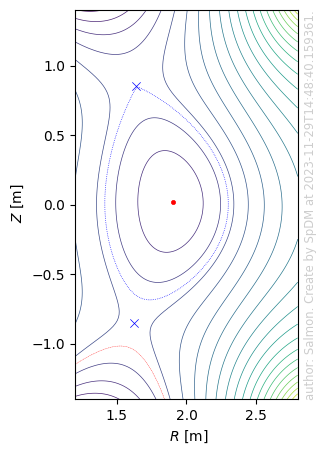

In [2]:
import spdm.view.View as sp_view

fig=sp_view.display(equilibrium)

#### 1D 位形分布
绘出当前时间片的一维 profile，磁面坐标为为 $\psi$ `equilibrium.time_slice.current.profiles_1d.psi`

In [3]:
eq_profiles_1d=equilibrium.time_slice.current.profiles_1d

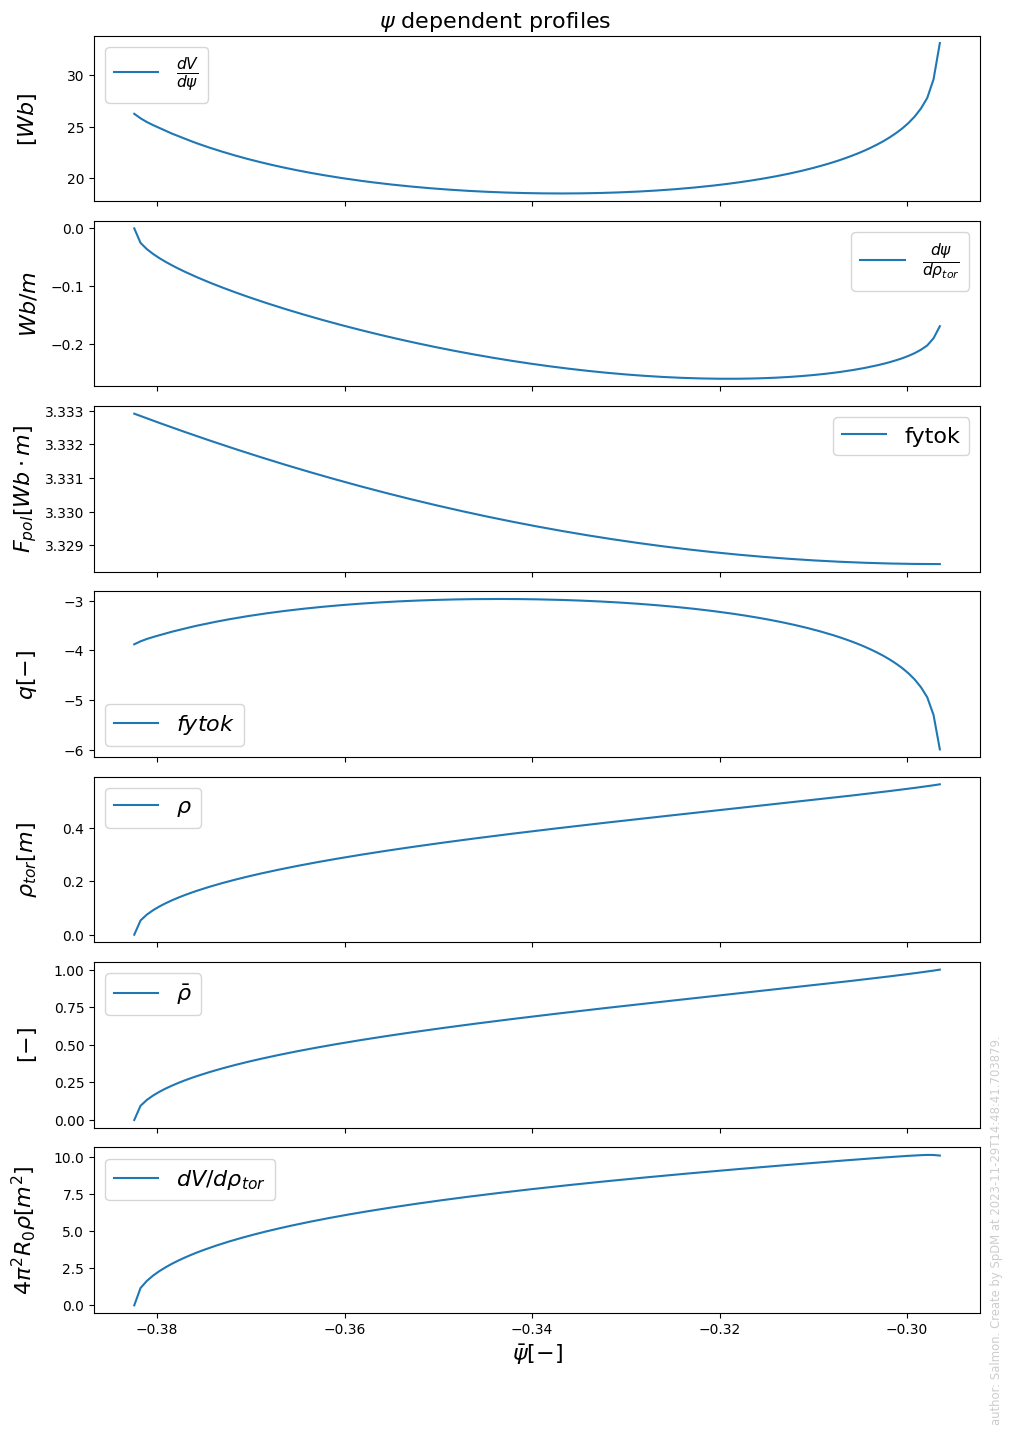

In [4]:
profs = sp_view.plot(
    [
        ((eq_profiles_1d.dvolume_dpsi, {"label": r"$\frac{dV}{d\psi}$"}), {"y_label": r"$[Wb]$"}),
        (eq_profiles_1d.dpsi_drho_tor, {"label": r"$\frac{d\psi}{d\rho_{tor}}$"}),
        ((eq_profiles_1d.f, {"label": r"fytok"}), {"y_label": r"$F_{pol} [Wb\cdot m]$"}),
        ((eq_profiles_1d.q, {"label": r"$fytok$"}), {"y_label": r"$q [-]$"}),
        ((eq_profiles_1d.rho_tor, {"label": r"$\rho$"}), {"y_label": r"$\rho_{tor}[m]$"}),
        ((eq_profiles_1d.rho_tor_norm, {"label": r"$\bar{\rho}$"}), {"y_label": r"[-]"}),
        ((eq_profiles_1d.dvolume_drho_tor, {"label": r"$dV/d\rho_{tor}$"}), {"y_label": r"$4\pi ^ 2 R_0 \rho[m ^ 2]$"}),
    ],
    x_axis=equilibrium.time_slice.current.profiles_1d.psi,
    x_label=r"$\bar{\psi}[-]$",
    title=r"$\psi$ dependent profiles",
)

### `class Equilibrium`

除了 $\psi$, $ff^{\prime}$, $p$ 等少数基础信息，其他物理量可通过 `fy_eq` 实时演算获得。

```{eval-rst}

.. autoclass:: fytok.modules.Equilibrium.EquilibriumGlobalQuantities
    :members:
    :show-inheritance: True

.. autoclass:: fytok.modules.Equilibrium.EquilibriumProfiles1D
    :members:
    :undoc-members:
    :show-inheritance: True

.. autoclass:: fytok.modules.Equilibrium.EquilibriumProfiles2D
    :members:
    :undoc-members:
    :show-inheritance: True

.. autoclass:: fytok.modules.Equilibrium.EquilibriumTimeSlice
    :undoc-members: profiles_1d,profiles_2d,global_quantities,vacuum_toroidal_field
    :show-inheritance: True

.. autoclass:: fytok.modules.Equilibrium.Equilibrium
    :members: time_slice
    :member-order: bysource
    :show-inheritance: True

```

## core_profiles
`core_profiles` 芯部分布位形。



``` {note}
`core_profiles.profiles_1d` 以归一化的 $\bar{\rho}$ 为磁面坐标，与 `equilibrium.profiles_1d`采用 $\psi$ 作为磁面坐标不同。

```

## 创建`core_profiles`实例

由专有数据文件，按照预定义的语义读取并转换成 IMAS Ontology。这里`iterprofiles`所代表的`xls`文件中保存了一系列芯部物理量分布。

In [5]:
from fytok.modules.CoreProfiles import CoreProfiles

core_profiles = CoreProfiles(f"file+iterprofiles://./data/15MA Inductive at burn-ASTRA.xls#core_profiles")

2023-11-29 14:48:43,597 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/utils/sp_export.py:66:sp_load_module: Load module spdm.plugins.data.plugin_iterprofiles


## 可视化

绘出一维分布

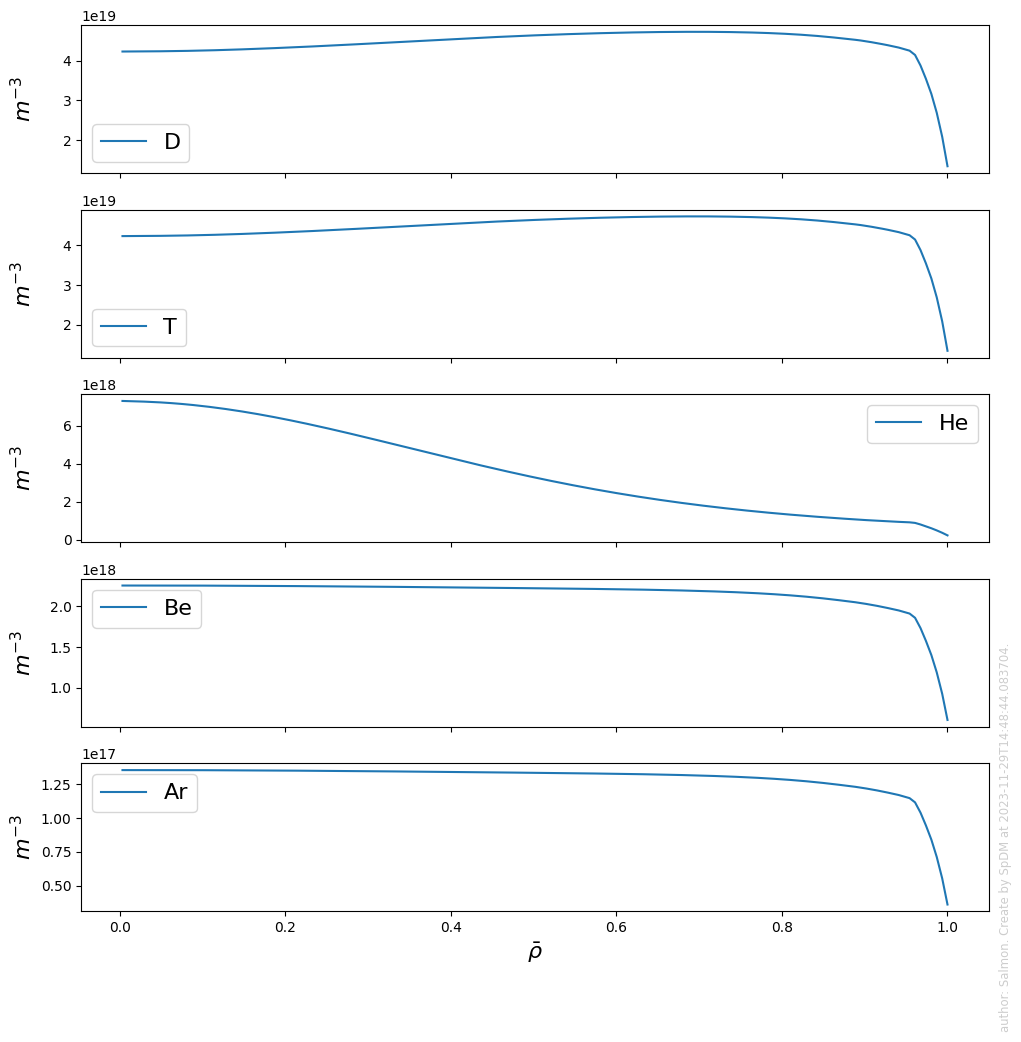

In [6]:
import spdm.view.View as sp_view

fig = sp_view.plot(
    [(ion.density_thermal, ion.label) for ion in core_profiles.time_slice.current.profiles_1d.ion],
    x_value=core_profiles.time_slice.current.profiles_1d.grid.rho_tor_norm,
    x_label=r"$\bar{\rho}$",
    y_label=r"$[m^{-3}]$",
)

### `class CoreProfiles`

```{eval-rst}
 
.. autoclass:: fytok.modules.CoreProfiles.CoreProfiles1D
    :members: 
    :undoc-members:
    :show-inheritance: True

.. autoclass:: fytok.modules.CoreProfiles.CoreProfilesTimeSlice
    :undoc-members: profiles_1d 
    :show-inheritance: True

.. autoclass:: fytok.modules.CoreProfiles.CoreProfiles
    :members: time_slice
    :member-order: bysource
    :show-inheritance: True

```

## core_transport



## core_sources